#Programming for Data Science



#The Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Dataset
df_covid = pd.read_csv('http://tiagodemelo.info/datasets/dados-curso-completo.csv.tar.gz', compression='gzip')
df_covid

,dados-curso-completo.csv,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0.0,138.0,pt,NaN,NaN,NaN,NaN,NaN,[]
1,2020-03-18 03:18:14,Seu Zé da Farmácia,seuzedafarmacia,"Em ação preventiva, o Governo do Estado suspen...",0.0,56.0,pt,NaN,NaN,NaN,NaN,NaN,[]
2,2020-03-29 12:09:27,Marília Oliveira 🇧🇷,Marioliveira_gb,Incrível como os defensores do fim do distanci...,0.0,5.0,pt,NaN,NaN,NaN,NaN,NaN,[]
3,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0.0,1885.0,pt,NaN,NaN,NaN,NaN,NaN,[]
4,2020-03-19 17:49:40,Nova Impressão,novaimpressao_,🚨Todos juntos contra COVID-19💪\n\nSolicite seu...,0.0,124.0,pt,Brasília,Brazil,BR,-47.8778,-15.77691,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658821,2020-05-12 13:02:34,Renato 🇧🇷,VerdadeExpress,"@OsmarTerra Sr. Osmar Terra, gostaria de ouvir...",0.0,4066.0,pt,NaN,NaN,NaN,NaN,NaN,[]
1658822,2020-03-19 18:16:30,eugeniocosta8,EugenioCosta8,CIENTISTA DE HARVARD PREVÊ QUE ATÉ 70% DO MUND...,3.0,5307.0,pt,NaN,NaN,NaN,NaN,NaN,['CORONAVIRUS']
1658823,2020-04-07 18:14:45,Wagner Mota - Seriedade + Geek,wagnermota75,"#BolsonaroTemRazaoSim porque, quando a prefeit...",0.0,1000.0,pt,NaN,NaN,NaN,NaN,NaN,['BolsonaroTemRazaoSim']
1658824,2020-06-02 16:04:51,Fotógrafo,omarcelogoulart,"Em meio a uma pandemia, estamos na luta também...",0.0,726.0,pt,São Félix do Araguaia,Brazil,BR,-53.0000,-11.00000,[]


#Data Overview

##No preprocessing

###Report

In [ ]:
#Installing pandas profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
#Importing ProfileReport
from pandas_profiling import ProfileReport

In [ ]:
#Running the profile
profile = ProfileReport(df_covid, title = 'Relatório - Pandas Profiling', html = {'style': {'full_width': True}}, minimal = True)
profile

In [ ]:
#Downloading the report (available in the left tab, folder icon)
profile.to_file(output_file = "dataframe_report_original.html")

In [ ]:
#Leaner report view
profile.to_widgets()

###Analysis

The dataset:

* Number of variables - 13;
  * 9 categorical;
  * 4 numerical.
* Number of observations - 1658826.

According to the report above, **37.3%** of the dataset corresponds to **missing data**. The variables that have the most missing data are:

* Latitude - 99.5%;
* Longitude - 99.5%
* Place - 95.5%;
* Country - 95.5%;
* Acronym - 95.5%.

Two of the users with the most comments in the dataset are Portuguese news channels, one of which appears twice because they have different usernames.

* Agência Lusa - 1404;
* tvi24 Últimas (1181) and tvi24 (1178) - 2359.

The retweet column has values ​​ranging from 0 (1314424 or 79.2%) to 1139763 (1 or <0.1%), causing the data to have a positive or right skewness, that is, greater than 0 (75.73862462). This behavior can be better observed in the graph below.















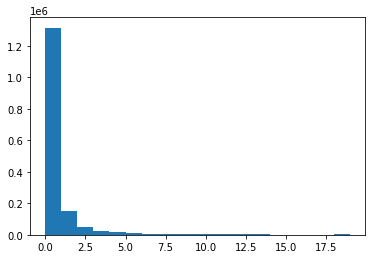

In [ ]:
plt.hist(df_covid['retweet'], bins=range(0, 20));

The data in the followers column shows the same behavior described above. The user with the largest number of followers is Donald Trump.

In [ ]:
df_covid.loc[df_covid.seguidores == 84241250]

,dados-curso-completo.csv,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
788393,2020-05-23 23:08:17,Donald J. Trump,realDonaldTrump,"RT @RyanAFournier: This morning, Joe Biden sai...",21369.0,84241250.0,en,NaN,NaN,NaN,NaN,NaN,[]


Most of the texts are in Portuguese (95.7%), but the report shows that only 4.3% of the tweets are from Brazil and Portugal. Other countries that have Portuguese as one of their languages ​​correspond to less than 1% of the dataset. This discrepancy between the information is probably due to missing data in the Country column.

##With preprocessing

###Creating the dataframe with questions

In [ ]:
#Selecting only text with questions
df_processado = df_covid[df_covid['texto'].str.contains('\?', na = False)]
pd.set_option('display.max_info_columns', 5000)
df_processado.reset_index(inplace = True, drop = True)
df_processado

In [ ]:
#Separating the questions and placing them with their data in lists
datas = []
usuarios = []
textos = []
retweets = []
num_seg = []
lugares = []
paises = []

import re
for index, row in df_processado.iterrows():
  if row['texto'].find(" ?"):
    row['texto'] = row['texto'].replace(" ?","?")
  m = re.split('(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)(\s|[A-Z].*)', row['texto'])
  for i in m:
    if i.count("?") > 0:
      datas.append(row['dados-curso-completo.csv'])
      usuarios.append(row['usuario'])
      textos.append(i)
      retweets.append(row['retweet'])
      num_seg.append(row['seguidores'])
      lugares.append(row['lugar'])
      paises.append(row['pais'])

In [ ]:
#Creating a dataframe with the processed data from a dictionary of lists
dados = {'dados-curso-completo.csv': datas, 'usuario': usuarios, 'texto': textos, 'retweet': retweets, 'seguidores': num_seg, 'lugar': lugares, 'pais': paises}
df_duvidasDB = pd.DataFrame(dados)
df_duvidasDB

,dados-curso-completo.csv,usuario,texto,retweet,seguidores,lugar,pais
0,2020-03-23 18:51:14,Gaboardi,@BolsonaroSP Cade o fundão deputado???,0.0,138.0,NaN,NaN
1,2020-04-01 21:11:07,🚩,Fumaça de cigarro pode propagar coronavírus?,0.0,1885.0,NaN,NaN
2,2020-06-25 11:09:19,Andreia Peraro,@ipratesMD @dr_pampers Será que corremos o ris...,0.0,86.0,NaN,NaN
3,2020-04-06 15:44:36,Diorgenes Pandini,Prioridade?!\n\n #COVID19 #floripa #isolamento...,0.0,219.0,NaN,NaN
4,2020-03-30 00:43:36,Valnei do Val,"Que tal uma notícia boa, indo na contramão do ...",0.0,201.0,NaN,NaN
...,...,...,...,...,...,...,...
196586,2020-05-25 22:53:13,O que houve com a couve?,Ansiedade?,0.0,1883.0,NaN,NaN
196587,2020-05-25 22:53:13,O que houve com a couve?,Angústia?,0.0,1883.0,NaN,NaN
196588,2020-05-25 22:53:13,O que houve com a couve?,Covid?,0.0,1883.0,NaN,NaN
196589,2020-03-13 17:26:18,broca,oms: tamo tendo pandemia evitar\n conglomerado...,0.0,361.0,NaN,NaN


###Organizing the new dataframe

In [ ]:
#Transforming the column with Date and Time to datetime
df_duvidasDB['dados-curso-completo.csv'] = pd.to_datetime(df_duvidasDB['dados-curso-completo.csv'])

In [ ]:
#Inserting day of the week into the dataframe
import datetime
from datetime import datetime as dt

weekday_name = ['Segunda', 'Terca', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo']

df_duvidasDB['dia_da_semana'] = df_duvidasDB['dados-curso-completo.csv']
df_duvidasDB['dia_da_semana'] = df_duvidasDB['dia_da_semana'].apply(
    lambda x: weekday_name[dt.weekday(x)]
)

df_duvidasDB

In [ ]:
#Storing date and time in separate columns
# Column 'Date'
df_duvidasDB['data'] = df_duvidasDB['dados-curso-completo.csv'].dt.strftime('%d-%m-%Y')
# Column 'Time'
df_duvidasDB['hora'] = df_duvidasDB['dados-curso-completo.csv'].dt.strftime('%H')

In [ ]:
#Removing column with date and time together
df_duvidasDB.drop('dados-curso-completo.csv', axis = 1)

In [ ]:
#Rearranging dataframe columns
df_duvidasDB = df_duvidasDB[['data', 'dia_da_semana', 'hora', 'usuario', 'texto', 'retweet', 'seguidores', 'lugar', 'pais']]

###General analysis of the processed dataset

In [ ]:
#Visualização mais enxuta do relatório
profile.to_widgets()

The dataset:
* Number of variables - 9
  * 7 categorical;
  * 2 numeric.
* Number of observations - 196591



According to the report above, 21.2% of the dataset corresponds to **missing data**. The variables that have the most missing data are:

* Place - 95.5%;
* Country - 95.5%.

#Question Classification

###Categorization

In [ ]:
#Creating a list with the themes
list_doencas = ['corona','virus','covid','Sars-Cov-2']
list_medicamentos = ['Azitromicina','AAS','Buscopan','Cloroquina','Hidroxicloroquina','Remdersivir','Dexametasona','Lopinavir','Ivermectina','Nitazoxanida','Plasma','chá','Heparina','limão','ozônio','Corticoide','Ritonavir']
list_organizacoes = ['OMS','Globo','Record','STF','Congresso','Senado','Camara','igreja','SUS','hospita','FDA','butatan','fvs','Oxford','MS','Ministério da Saúde','SBPT','AMIB']
list_pessoas = ['Bolsonaro','Trump','Lula','Mandetta','Mandeta','Draúzio','Wilson Lima','Witzel','Dória','Crivela','Arthur Neto','Pazuello','Boris','Johnson','Macron','Osmar Terra','Nelson Teich']

In [ ]:
#Sorting the questions
for i in range(len(list_doencas)):
  df_duvidasDB.loc[df_duvidasDB.texto.str.contains(list_doencas[i], flags = re.I, regex = True),'doencas'] = 'sim'

for i in range(len(list_medicamentos)):
  df_duvidasDB.loc[df_duvidasDB.texto.str.contains(list_medicamentos[i], flags = re.I, regex = True),'medicamentos'] = 'sim'

for i in range(len(list_organizacoes)):
  df_duvidasDB.loc[df_duvidasDB.texto.str.contains(list_organizacoes[i], flags = re.I, regex = True),'organizacoes'] = 'sim'

for i in range(len(list_pessoas)):
  df_duvidasDB.loc[df_duvidasDB.texto.str.contains(list_pessoas[i], flags = re.I, regex = True),'pessoas'] = 'sim'

###Analysis

In [ ]:
#Number of questions related to each topic per day of the week
perg_doencas = df_duvidasDB['dia_da_semana'][df_duvidasDB['doencas'] == 'sim']
perg_medicamentos = df_duvidasDB['dia_da_semana'][df_duvidasDB['medicamentos'] == 'sim']
perg_organizacoes = df_duvidasDB['dia_da_semana'][df_duvidasDB['organizacoes'] == 'sim']
perg_pessoas = df_duvidasDB['dia_da_semana'][df_duvidasDB['pessoas'] == 'sim']
perg_doencas.value_counts()

Quarta     9792
Terca      9620
Quinta     9602
Sexta      6386
Segunda    6265
Sabado     6044
Domingo    5420
Name: dia_da_semana, dtype: int64

In [ ]:
#Number of questions related to each topic per day of the week, in order
quantidades = df_duvidasDB.groupby('dia_da_semana')[['doencas','medicamentos','organizacoes','pessoas']].count().reset_index()

weekday_name = ['Segunda', 'Terca', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo']
mapping = {day: i for i, day in enumerate(weekday_name)}
key = quantidades['dia_da_semana'].map(mapping)

quantidades = quantidades.iloc[key.argsort()].set_index('dia_da_semana')
quantidades

,doencas,medicamentos,organizacoes,pessoas
dia_da_semana,,,,
Segunda,6265,2060,1116,1692
Terca,9620,5295,1601,3094
Quarta,9792,3222,1436,2205
Quinta,9602,2339,1433,2396
Sexta,6386,2800,1000,1357
Sabado,6044,1666,781,1269
Domingo,5420,1580,735,1153


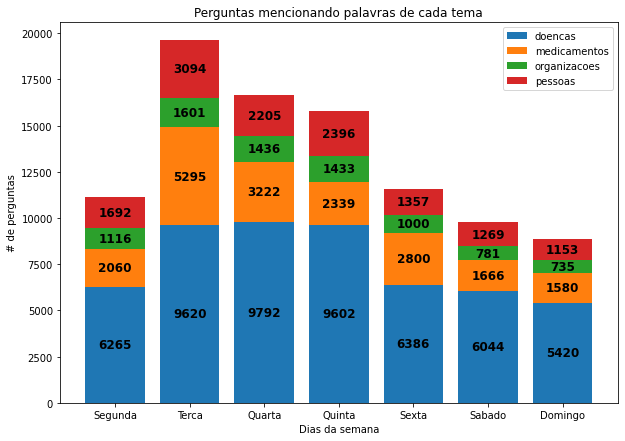

In [ ]:
#Graph of the number of questions related to each topic by day of the week
fig = plt.figure(figsize = (10, 7), facecolor = 'w')
ax = fig.add_subplot(1, 1, 1)

doencas = [6265, 9620, 9792, 9602, 6386, 6044, 5420]
medicamentos = [2060, 5295, 3222, 2339, 2800, 1666, 1580]
organizacoes = [1116, 1601, 1436, 1433, 1000, 781, 735]
pessoas = [1692, 3094, 2205, 2396, 1357, 1269, 1153]

ax1 = ax.bar(x = weekday_name, height = doencas, label = 'doencas')
ax2 = ax.bar(x = weekday_name, height = medicamentos, label = 'medicamentos', bottom = doencas)
ax3 = ax.bar(x = weekday_name, height = organizacoes, label = 'organizacoes', bottom = np.array(doencas) + np.array(medicamentos))
ax4 = ax.bar(x = weekday_name, height = pessoas, label = 'pessoas', bottom = np.array(doencas) + np.array(medicamentos) + np.array(organizacoes))

plt.title('Perguntas mencionando palavras de cada tema')
plt.xlabel('Dias da semana')
plt.ylabel('# de perguntas')

for r1, r2, r3, r4 in zip(ax1, ax2, ax3, ax4):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    h4 = r4.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., '%d' % h1, ha = 'center', va ='center', color = 'black', fontsize = 12, fontweight = 'bold')
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., '%d' % h2, ha ='center', va ='center', color = 'black', fontsize = 12, fontweight = 'bold')
    plt.text(r3.get_x() + r3.get_width() / 2., h1 + h2 + h3 / 2., '%d' % h3, ha = 'center', va ='center', color = 'black', fontsize = 12, fontweight = 'bold')
    plt.text(r4.get_x() + r4.get_width() / 2., h1 + h2 + h3 + h4 / 2., '%d' % h4, ha = 'center', va = 'center', color = 'black', fontsize = 12, fontweight = 'bold')

plt.legend()
plt.show()

On February 4 (Tuesday), the president declared a state of emergency to contain the novel coronavirus in Brazil.

On February 25, 2020 (Tuesday), the Hospital Israelita Albert Einstein registered the notification of what, the following day, would be confirmed by the Ministry of Health as the first case of COVID-19 in Brazil.

On March 17, 2020 (Tuesday), in the morning, the State of São Paulo confirmed the first death in Brazil, of a 62-year-old man who was hospitalized in a private hospital.

On May 5 (Tuesday), Brazil registered 600 deaths in 24 hours. It was the highest number of deaths in one day since the beginning of the pandemic.

In [ ]:
df_duvidasDB['texto'][df_duvidasDB['data'] == '04-02-2020']

41        riot fazendo Clash na data do carnaval...a esc...
288                                     e você também acha?
301       Você acha mesmo que o coronavirus vai sobreviv...
474       @indiatvnews @recalleleitoral Coronavirus.já r...
550       E se o #CoronaVirus for apenas uma estratégia ...
                                ...                        
195503    @n_medeiros16 que historia é essa de suspeita ...
195649    @Joao_Almirante Eu já sobrevivi a isso, acha q...
196061                       am I going absolutely insane??
196318                                  Que demora é essa!?
196578      o que que é o corona vírus perto das beliebers?
Name: texto, Length: 1104, dtype: object

#Temporal Analysis

###Day of the week

In [ ]:
#Number of questions per day of the week
df_duvidasDB['dia_da_semana'].value_counts()

Terca      39416
Quarta     34264
Quinta     32583
Segunda    28650
Sexta      23407
Domingo    19341
Sabado     18930
Name: dia_da_semana, dtype: int64

In [ ]:
#Number of questions per day of the week, in order
quantidade = df_duvidasDB['dia_da_semana'].value_counts().reset_index()
quantidade.columns = ['dia_da_semana', 'quantidade']

weekday_name = ['Segunda', 'Terca', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo']
mapping = {day: i for i, day in enumerate(weekday_name)}
key = quantidade['dia_da_semana'].map(mapping)

quantidade = quantidade.iloc[key.argsort()].set_index('dia_da_semana')
quantidade

,quantidade
dia_da_semana,
Segunda,28650
Terca,39416
Quarta,34264
Quinta,32583
Sexta,23407
Sabado,18930
Domingo,19341


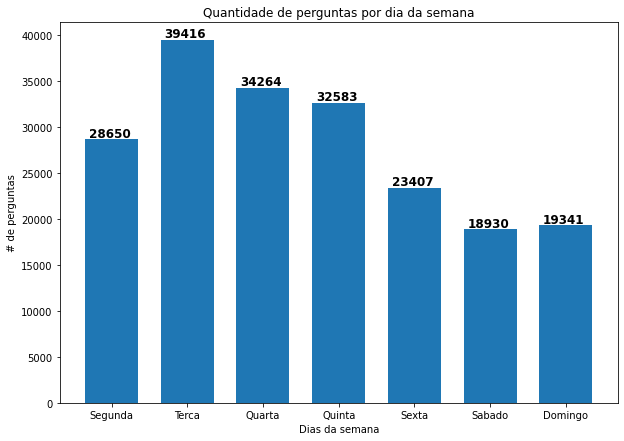

In [ ]:
#Graph of the number of questions per day of the week
fig = plt.figure(figsize = (10, 7), facecolor = 'w')
ax  = fig.add_subplot(1, 1, 1)

dados = [28650, 39416, 34264, 32583, 23407, 18930, 19341]

ax.bar(x = weekday_name, height = dados, width = 0.7)

plt.title('Quantidade de perguntas por dia da semana')
plt.xlabel('Dias da semana')
plt.ylabel('# de perguntas')

for index,data in enumerate(dados):
    plt.text(x = (index-0.30), y = (data*1.01), s = data, fontweight = 'bold', fontdict = dict(fontsize = 12))

plt.show()

On February 4 (Tuesday), the president declared a state of emergency to contain the novel coronavirus in Brazil.

On February 25, 2020 (Tuesday), the Hospital Israelita Albert Einstein registered the notification of what, the following day, would be confirmed by the Ministry of Health as the first case of COVID-19 in Brazil.

On March 17, 2020 (Tuesday), in the morning, the State of São Paulo confirmed the first death in Brazil, of a 62-year-old man who was hospitalized in a private hospital.

On May 5 (Tuesday), Brazil registered 600 deaths in 24 hours. It was the highest number of deaths in one day since the beginning of the pandemic.

In [ ]:
df_duvidasDB['texto'][df_duvidasDB['data'] == '04-02-2020']

41        riot fazendo Clash na data do carnaval...a esc...
288                                     e você também acha?
301       Você acha mesmo que o coronavirus vai sobreviv...
474       @indiatvnews @recalleleitoral Coronavirus.já r...
550       E se o #CoronaVirus for apenas uma estratégia ...
                                ...                        
195503    @n_medeiros16 que historia é essa de suspeita ...
195649    @Joao_Almirante Eu já sobrevivi a isso, acha q...
196061                       am I going absolutely insane??
196318                                  Que demora é essa!?
196578      o que que é o corona vírus perto das beliebers?
Name: texto, Length: 1104, dtype: object

###Hora

In [ ]:
#Number of questions per hour
df_duvidasDB['hora'].value_counts()

23    27870
22    18224
21    16464
20    15972
19    14408
18    12534
17    11810
16    11198
15     9486
14     7917
13     7464
00     6045
12     5914
01     5661
02     4915
11     4796
03     4107
10     2936
04     2512
05     1753
09     1629
06     1050
08      999
07      927
Name: hora, dtype: int64

In [ ]:
#Number of questions per hour, in that order
quantidade = df_duvidasDB['hora'].value_counts().reset_index()
quantidade.columns = ['hora', 'quantidade']

horario = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']

mapping = {hour: i for i, hour in enumerate(horario)}
key = quantidade['hora'].map(mapping)

quantidade = quantidade.iloc[key.argsort()].set_index('hora')
quantidade

,quantidade
hora,
00,6045
01,5661
02,4915
03,4107
04,2512
05,1753
06,1050
07,927
08,999


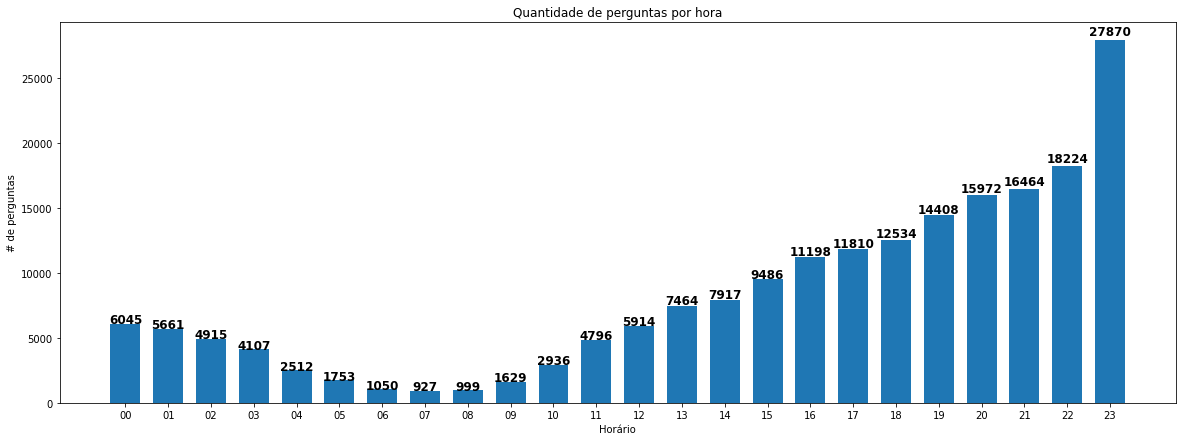

In [ ]:
#Chart of the number of questions per hour
fig = plt.figure(figsize = (20, 7), facecolor = 'w')
ax = fig.add_subplot(1, 1, 1)

dados = [6045, 5661, 4915, 4107, 2512, 1753, 1050, 927, 999, 1629, 2936, 4796, 5914, 7464, 7917, 9486, 11198, 11810, 12534, 14408, 15972, 16464, 18224, 27870]

ax.bar(x = horario, height = dados, width = 0.7)

plt.title('Quantidade de perguntas por hora')
plt.xlabel('Horário')
plt.ylabel('# de perguntas')

for index,data in enumerate(dados):
  plt.text(x = index, y = (data * 1.015), s = data, horizontalalignment = 'center', fontweight = 'bold', fontdict = dict(fontsize = 12))

plt.show()

###Mês

In [ ]:
#Number of questions per month
df_duvidasDB['data'] = df_duvidasDB['data'].astype('datetime64')
quantidade = df_duvidasDB.groupby(df_duvidasDB['data'].dt.month)['texto'].count().reset_index()
quantidade

,data,texto
0,1,14681
1,2,13471
2,3,44185
3,4,24570
4,5,43712
5,6,19445
6,7,10365
7,8,6562
8,9,3721
9,10,3528


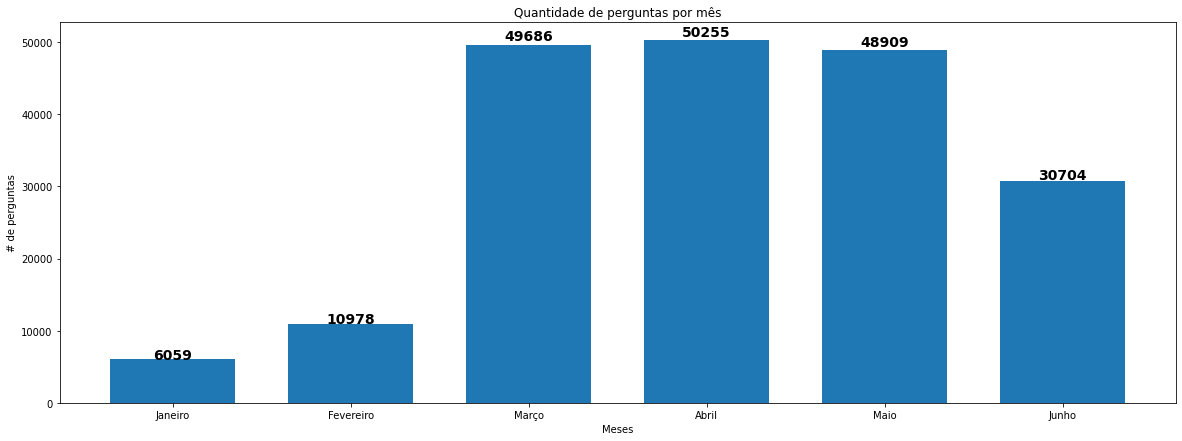

In [ ]:
#Graph of number of questions per month
fig = plt.figure(figsize = (20, 7), facecolor = 'w')
ax = fig.add_subplot(1, 1, 1)

meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho']
dados = [6059, 10978, 49686, 50255, 48909, 30704]

ax.bar(x = meses, height = dados, width = 0.7)

plt.title('Quantidade de perguntas por mês')
plt.xlabel('Meses')
plt.ylabel('# de perguntas')

for index,data in enumerate(dados):
  plt.text(x = index, y = (data * 1.012), s = data, horizontalalignment = 'center', fontweight = 'bold', fontdict = dict(fontsize = 14))

#Geographic Analysis

###Country

In [ ]:
#Number of questions per country
df_duvidasDB['pais'].value_counts()

Brazil                        8130
Portugal                       266
United States                  113
Italy                           50
United Kingdom                  46
Spain                           34
Republic of Mozambique          26
France                          26
Canada                          25
Argentina                       17
Ireland                         15
Angola                          10
Japan                            8
Chile                            6
New Zealand                      6
Colombia                         6
Switzerland                      6
Belgium                          6
Germany                          6
Nigeria                          6
Peru                             5
The Netherlands                  5
Bahrain                          4
India                            4
Australia                        4
Paraguay                         3
Egypt                            3
Cape Verde                       3
Bolivia             

In [ ]:
#Number (above 10) of questions per country
count = df_duvidasDB['pais'].value_counts().reset_index()
count.columns = ['pais', 'quantidade']
qtd = count[count.quantidade >= 10]
qtd.values

array([['Brazil', 8130],
       ['Portugal', 266],
       ['United States', 113],
       ['Italy', 50],
       ['United Kingdom', 46],
       ['Spain', 34],
       ['Republic of Mozambique', 26],
       ['France', 26],
       ['Canada', 25],
       ['Argentina', 17],
       ['Ireland', 15],
       ['Angola', 10]], dtype=object)

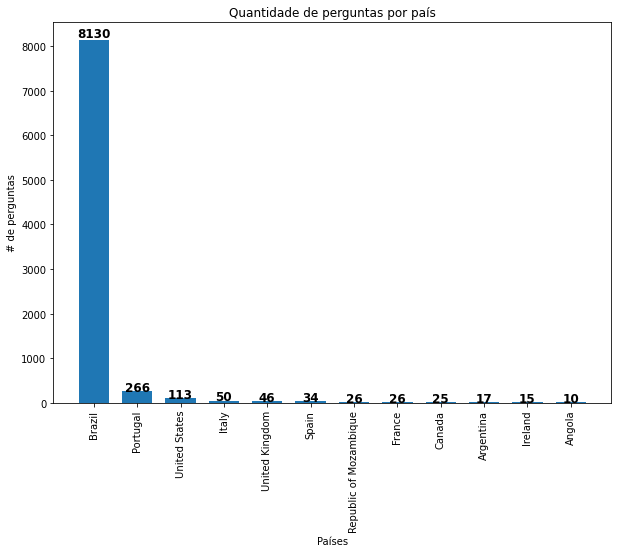

In [ ]:
#Graph of the number (above 10) of questions by country
fig = plt.figure(figsize=(10, 7), facecolor='w')
ax  = fig.add_subplot(1,1,1)

paises = ['Brazil','Portugal','United States','Italy','United Kingdom','Spain','Republic of Mozambique','France','Canada','Argentina','Ireland','Angola']
dados = [8130,266,113,50,46,34,26,26,25,17,15,10]

ax.bar(x = paises, height = dados, width = 0.7)

plt.title('Quantidade de perguntas por país')
plt.xlabel('Países')
plt.ylabel('# de perguntas')
plt.xticks(rotation = 90)

for index,data in enumerate(dados):
    plt.text(x = index, y = (data*1.01), s = data , horizontalalignment = 'center', fontweight = 'bold', fontdict = dict(fontsize = 12))

plt.show();

In [ ]:
#Number of questions related to each topic by country
df_duvidasDB.groupby('pais')[['doencas','medicamentos','organizacoes','pessoas']].count()

,doencas,medicamentos,organizacoes,pessoas
pais,,,,
Angola,5,0,0,0
Argentina,9,0,0,0
Armenia,1,0,1,0
Australia,1,0,0,0
Austria,1,0,0,0
Bahrain,1,0,1,0
Belgium,2,0,0,0
Bolivia,0,0,0,0
Brazil,2148,656,308,522


In [ ]:
#Number (above 10) of questions related to each topic per country
quantidade = df_duvidasDB.groupby('pais')[['doencas','medicamentos','organizacoes','pessoas']].count().reset_index()
qtd = quantidade[quantidade.doencas >= 10]
qtd

,pais,doencas,medicamentos,organizacoes,pessoas
8,Brazil,2148,656,308,522
42,Portugal,100,4,6,4
46,Spain,10,2,0,0
55,United Kingdom,12,0,2,2
56,United States,33,5,6,10


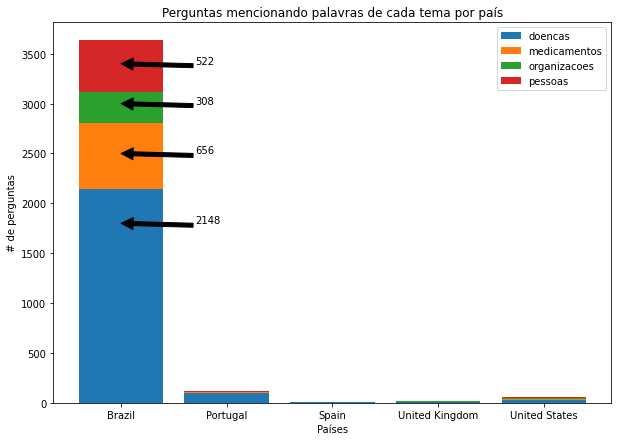

In [ ]:
#Graph showing the number (above 10) of questions related to each topic by country
fig = plt.figure(figsize = (10, 7), facecolor = 'w')
ax = fig.add_subplot(1, 1, 1)

paises = ['Brazil', 'Portugal', 'Spain', 'United Kingdom', 'United States']

doencas = [2148, 100, 10, 12, 33]
medicamentos = [656, 4, 2, 0, 5]
organizacoes = [308, 6, 0, 2, 6]
pessoas = [522, 4, 0, 2, 10]

ax1 = ax.bar(x = paises, height = doencas, label = 'doencas')
ax2 = ax.bar(x = paises, height = medicamentos, label = 'medicamentos', bottom = doencas)
ax3 = ax.bar(x = paises, height = organizacoes, label = 'organizacoes', bottom = np.array(doencas) + np.array(medicamentos))
ax4 = ax.bar(x = paises, height = pessoas, label = 'pessoas', bottom = np.array(doencas) + np.array(medicamentos) + np.array(organizacoes))

plt.title('Perguntas mencionando palavras de cada tema por país')
plt.xlabel('Países')
plt.ylabel('# de perguntas')

plt.annotate('2148', xy = (0, 1800), xytext = (0.7, 1800), arrowprops = dict(facecolor = 'black'))
plt.annotate('656', xy = (0, 2500), xytext = (0.7, 2500), arrowprops = dict(facecolor = 'black'))
plt.annotate('308', xy = (0, 3000), xytext = (0.7, 3000), arrowprops = dict(facecolor = 'black'))
plt.annotate('522', xy = (0, 3400), xytext = (0.7, 3400), arrowprops = dict(facecolor = 'black'))

plt.legend()
plt.show()

###Cities

In [ ]:
#Number of questions per place
df_duvidasDB['lugar'].value_counts()

Sao Paulo           1030
Rio de Janeiro       961
Brasília             314
Belo Horizonte       236
Porto Alegre         224
                    ... 
Barreiras              1
São Luís do Curu       1
Tottenham              1
Conchas                1
Paraí                  1
Name: lugar, Length: 1285, dtype: int64

In [ ]:
#Number (over 100) of questions per place
count = df_duvidasDB['lugar'].value_counts().reset_index()
count.columns = ['lugar', 'quantidade']
qtd = count[count.quantidade >= 100]
qtd.quantidade

0     1030
1      961
2      314
3      236
4      224
5      201
6      167
7      151
8      136
9      135
10     120
11     116
Name: quantidade, dtype: int64

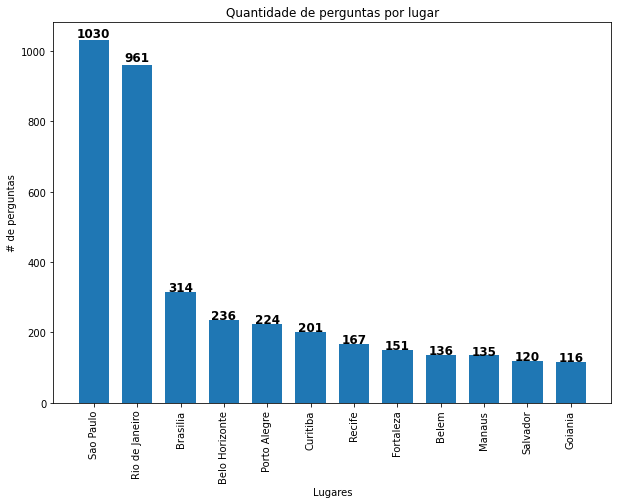

In [ ]:
#Graph of the number (above 100) of questions per place
fig = plt.figure(figsize=(10, 7), facecolor='w')
ax  = fig.add_subplot(1,1,1)

lugares = ['Sao Paulo', 'Rio de Janeiro', 'Brasilia', 'Belo Horizonte', 'Porto Alegre', 'Curitiba', 'Recife', 'Fortaleza', 'Belem', 'Manaus', 'Salvador', 'Goiania']
dados = [1030, 961, 314, 236, 224, 201, 167, 151, 136, 135, 120, 116]

ax.bar(x = lugares, height = dados, width=0.7)

plt.title('Quantidade de perguntas por lugar')
plt.xlabel('Lugares')
plt.ylabel('# de perguntas')
plt.xticks(rotation = 90)

for index,data in enumerate(dados):
    plt.text(x=index, y =data*1.01, s=data , horizontalalignment='center', fontweight='bold', fontdict=dict(fontsize=12))

plt.show();

In [ ]:
#Number of questions related to each topic per place
df_duvidasDB.groupby('lugar')[['doencas','medicamentos','organizacoes','pessoas']].count()

,doencas,medicamentos,organizacoes,pessoas
lugar,,,,
@oBarreiro - Capital Do MUNDO,0,0,0,0
A Coruña,0,0,0,0
Abaetetuba,1,1,0,0
Abrantes,1,0,0,0
Abrera,1,0,0,0
...,...,...,...,...
Águas de Chapecó,1,0,0,0
Águeda,1,0,0,0
Évora,0,0,0,0


In [ ]:
#Number (over 25) of questions related to each topic per place
quantidade = df_duvidasDB.groupby('lugar')[['doencas','medicamentos','organizacoes','pessoas']].count().reset_index()
qtd = quantidade[quantidade.doencas >= 25]
qtd

,lugar,doencas,medicamentos,organizacoes,pessoas
137,Belo Horizonte,64,9,6,14
139,Belém,38,10,4,12
175,Brasília,73,14,14,22
353,Curitiba,49,18,7,15
429,Fortaleza,44,11,3,10
452,Goiânia,26,11,5,6
685,Manaus,34,12,5,8
765,Natal,25,15,3,8
917,Porto Alegre,41,21,4,11
949,Recife,35,13,5,8


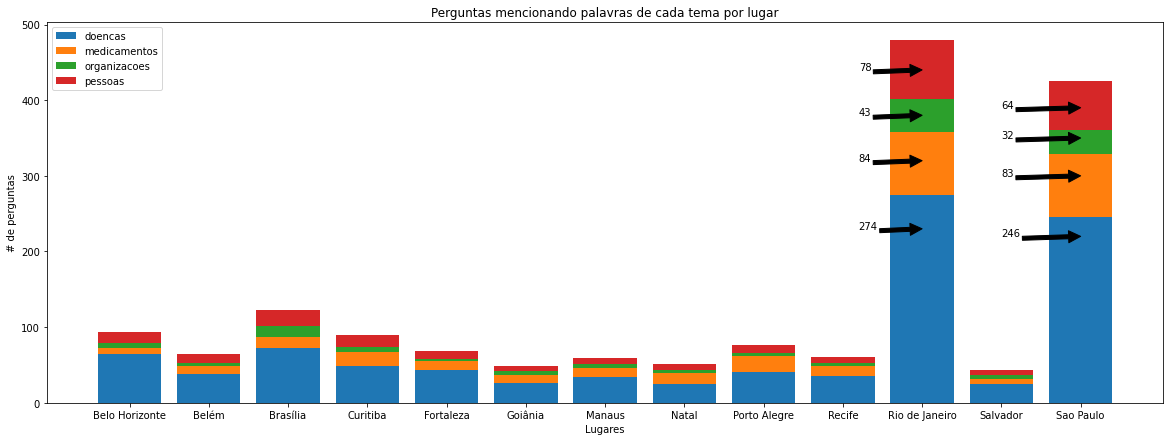

In [ ]:
#Graph of the number (above 25) of questions related to each topic by location
fig = plt.figure(figsize = (20, 7), facecolor = 'w')
ax = fig.add_subplot(1, 1, 1)

lugares = ['Belo Horizonte', 'Belém', 'Brasília', 'Curitiba', 'Fortaleza', 'Goiânia', 'Manaus', 'Natal', 'Porto Alegre', 'Recife', 'Rio de Janeiro', 'Salvador', 'Sao Paulo']

doencas = [64, 38, 73, 49, 44, 26, 34, 25, 41, 35, 274, 25, 246]
medicamentos = [9, 10, 14, 18, 11, 11, 12, 15, 21, 13, 84, 7, 83]
organizacoes = [6, 4, 14, 7, 3, 5, 5, 3, 4, 5, 43, 5, 32]
pessoas = [14, 12, 22, 15, 10, 6, 8, 8, 11, 8, 78, 7, 64]

ax1 = ax.bar(x = lugares, height = doencas, label = 'doencas')
ax2 = ax.bar(x = lugares, height = medicamentos, label = 'medicamentos', bottom = doencas)
ax3 = ax.bar(x = lugares, height = organizacoes, label = 'organizacoes', bottom = np.array(doencas) + np.array(medicamentos))
ax4 = ax.bar(x = lugares, height = pessoas, label = 'pessoas', bottom = np.array(doencas) + np.array(medicamentos) + np.array(organizacoes))

plt.title('Perguntas mencionando palavras de cada tema por lugar')
plt.xlabel('Lugares')
plt.ylabel('# de perguntas')

plt.annotate('274', xy = (10, 230), xytext = (9.2, 230), arrowprops = dict(facecolor = 'black'))
plt.annotate('84', xy = (10, 320), xytext = (9.2, 320), arrowprops = dict(facecolor = 'black'))
plt.annotate('43', xy = (10, 380), xytext = (9.2, 380), arrowprops = dict(facecolor = 'black'))
plt.annotate('78', xy = (10, 440), xytext = (9.2, 440), arrowprops = dict(facecolor = 'black'))

plt.annotate('246', xy = (12, 220), xytext = (11, 220), arrowprops = dict(facecolor = 'black'))
plt.annotate('83', xy = (12, 300), xytext = (11, 300), arrowprops = dict(facecolor = 'black'))
plt.annotate('32', xy = (12, 350), xytext = (11, 350), arrowprops = dict(facecolor = 'black'))
plt.annotate('64', xy = (12, 390), xytext = (11, 390), arrowprops = dict(facecolor = 'black'))

plt.legend()
plt.show()